In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Gauss Newton - Non Linear Least Squares

https://www.youtube.com/watch?v=Kln0ZQ7sX8k


## 1D

In [26]:
def f1(a, b, x):
    return a*x/(b+x)

In [27]:
n = 50
x = np.linspace(0, 5, n)
y = f1(2, 3, x) + np.random.normal(0, 0.1, n)

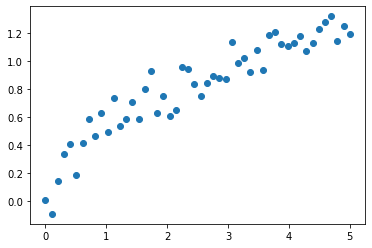

In [28]:
plt.scatter(x,y)

In [29]:
def jacobian_2p(f, a, b, x):
    eps = 1e-6
    grad_a = (f(a+eps, b, x) - f(a-eps, b, x)) / (2*eps)
    grad_b = (f(a, b+eps, x) - f(a, b-eps, x)) / (2*eps)
    return np.column_stack([grad_a, grad_b])    

In [30]:
def gauss_newton_2p(f, x, y, a0, b0, tol, max_iter):
    old = new = np.array([a0, b0])
    for i in range(max_iter):
        old = new
        J = jacobian_2p(f, old[0], old[1], x)
        delta_y = y - f(old[0], old[1], x)
        new = old + np.linalg.inv(J.T@J)@J.T@delta_y
        if np.linalg.norm(old-new) < tol:
            break
    return new

In [32]:
a, b = gauss_newton_2p(f1, x, y, 5, 1, 1e-5, 10)
print(a, b)

1.8036872045991157 2.4936371011286913


In [33]:
yhat = f1(a, b, x)

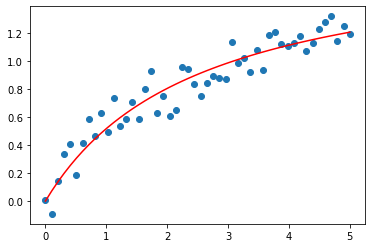

In [34]:
plt.scatter(x, y)
plt.plot(x, yhat, color='red')

## 2D

In [10]:
def f2d(a, b, X):
    return a - (1 / b) * X[:, 0]**2 - X[:, 1]**2

In [35]:
# generate data from real model
n = 50
x1 = np.linspace(-5, 5, n)
x2 = np.linspace(-5, 5, n)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack([X1.ravel(), X2.ravel()])
y = f2d(5, 4, X) + np.random.normal(0, 1, size=len(X))


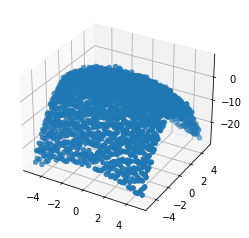

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, marker='o')

In [37]:
a, b = gauss_newton_2p(f2d, X, y, 3, 1, 1e-5, 10)
print(a, b)
yhat =f2d(a, b, X)

5.012236464766069 4.002879751978717


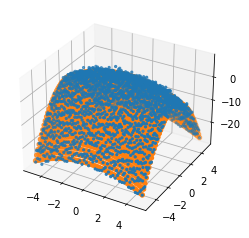

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, marker='.')
ax.scatter(X[:, 0], X[:, 1], yhat, marker='o')

In [39]:
mean = np.mean(y-yhat)
std = np.std(y-yhat)
print(mean,std)

4.427474209478532e-12 0.9971784440238002


## More general Jacobian

In [51]:
def Jacobian(f, b, x):
    eps = 1e-6
    grads = []
    for i in range(len(b)):
        t = np.zeros_like(b).astype(np.float64)
        t[i] = t[i] + eps
        grad = (f(b+t, x) - f(b-t, x)) / (2*eps)
        grads.append(grad)
    return np.column_stack(grads)

In [52]:
def gauss_newton(f, x, y, b0, tol, max_iter):
    old = new = b0
    for i in range(max_iter):
        old = new
        J = Jacobian(f, old, x)
        dy = y - f(old, x)
        new = old + np.linalg.inv(J.T@J)@J.T@dy
        if np.linalg.norm(old - new) < tol:
            break
    return new

In [45]:
def f3(b, X):
    return b[0] - (1./b[1])*X[:, 0]**2 - (1/b[2])*X[:, 1]**2

In [53]:
bs = gauss_newton(f3, X, y, np.array([3, 1, 1]), 1e-5, 10)
bs

array([5.03299605, 4.00287975, 0.99761226])

## Scipy

In [56]:
from scipy.optimize import least_squares

def func(b, X, y):
    return f3(b, X) - y

In [58]:
res = least_squares(func, np.array([3, 1, 1]), args=(X, y))
res.x

array([5.03299605, 4.00287975, 0.99761226])